In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import metrics

xtrain=pd.read_csv(r"C:\Users\13177\Downloads\iris_train.csv")
xtest = pd.read_csv(r"C:\Users\13177\Downloads\iris_test.csv")
xtrain['label'] = xtrain["label"].apply(lambda x: 1 if x ==2 else 0)
xtrain

,f1,f2,f3,f4,label
0,6.3,2.9,5.6,1.8,1
1,6.4,2.8,5.6,2.1,1
2,5.5,2.6,4.4,1.2,1
3,5.7,2.9,4.2,1.3,1
4,6.9,3.2,5.7,2.3,1
...,...,...,...,...,...
115,7.7,3.8,6.7,2.2,1
116,6.5,2.8,4.6,1.5,1
117,4.8,3.0,1.4,0.1,0
118,5.6,3.0,4.1,1.3,1


In [15]:
input_units=4
hidden_units=2
output_units=1
b1=np.random.rand(hidden_units).reshape(hidden_units,1)
b2=np.random.rand(output_units).reshape(output_units,1)
w_in=np.random.rand(input_units,hidden_units)
w_output=np.random.rand(hidden_units,output_units)
print(w_in)

[[0.48205598 0.58058349]
 [0.12962043 0.13015608]
 [0.07547451 0.11676306]
 [0.70542262 0.41251705]]


In [16]:
data_order=np.arange(0,len(xtrain))
data_order

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])

In [17]:
def logis(x):
  return 1/(1+np.exp(-x))
def relu(x):
  return np.maximum(0,x)
def d_relu(x):
  if x>0:
    return 1
  return 0

[[ 0.75813771 -0.61574098]
 [ 0.33970214 -2.21600944]
 [ 0.10638662  2.94985988]
 [ 0.69877083  1.7413145 ]]
[[-2.3975469 ]
 [10.38581669]]
75


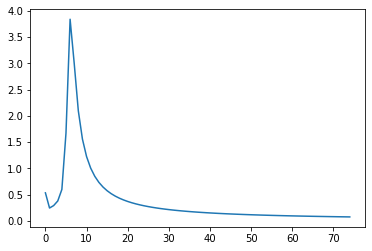

In [18]:
l_rate=0.1
n_epochs=75
act_choice=[logis,relu]
act_hide_chosen=act_choice[0]
diff1=[]
i=0
while i<=n_epochs-1:
    t=0
    error_sum=0
    while t<=len(data_order)-1:
        idata=np.array(xtrain.iloc[data_order[t]]).reshape(5,1)
        x_i=idata[:4]
        y_label=idata[4:]
       
        net=b1 +np.dot(w_in.T,x_i)
        act_hide=np.vectorize(act_hide_chosen)
        z_i=act_hide(net)
        net0=b2+np.dot(w_output.T,z_i)
        act_out=np.vectorize(logis)
        o_i=act_out(net0)[0][0] 
        a=o_i-y_label
        error_sum=error_sum+a[0][0]
      
        de=o_i*(1-o_i)*(o_i-y_label)/(o_i*(1-o_i))
        if act_hide_chosen==logis:  
            dh=np.multiply(np.multiply(z_i,1-z_i),w_output)*de
        else:
            diff=np.vectorize(d_relu)
            diff_term=diff(net)
            dh=np.multiply(w_output,diff_term)*de
    
        del_out=de
        del_hide=dh
        b2=b2-l_rate*del_out
        b1=b1-l_rate*del_hide
      
        del_w=z_i*de
        hide_del_w=np.dot(x_i,dh.T)
        w_output=w_output-l_rate*del_w
        w_in=w_in-l_rate*hide_del_w
        t=t+1
    diff1.append(error_sum)
    i=i+1
print(w_in)
print(w_output)
print(len(diff1))
plt.plot(np.arange(0,n_epochs).reshape(n_epochs,1),np.array(diff1).reshape(n_epochs,1))

In [19]:
xtest
ypred=[]
i=0
while i<=len(xtest)-1:
    idata=np.array(xtest.iloc[i]).reshape(5,1)
    ixtest=idata[:4]
 
    net=b1 +np.dot(w_in.T,ixtest)
    act_hide=np.vectorize(act_hide_chosen)
    z_i=act_hide(net)
    net0=b2+np.dot(w_output.T,z_i)
    act_out=np.vectorize(logis)
    if act_out(net0)[0][0]>=0.5:
        ypred.append(1)
    else:
        ypred.append(0)
    i=i+1
ypred

[1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1]

In [20]:
ytest=xtest["label"]
xtest["label"] = xtest["label"].apply(lambda x: 1 if x ==2 else 0)
ydata=list(xtest["label"])

In [21]:
conmat={"TP":0,"TN":0,"FP":0,"FN":0}
print(len(ydata))
for i in range(len(ydata)):
  if ydata[i]==ypred[i]==1:
    conmat["TP"]=conmat["TP"]+1
  elif ydata[i]==ypred[i]==0:
    conmat["TN"]=conmat["TN"]+1
  elif ydata[i]==1 and ypred[i]==0:
    conmat["FN"]=conmat["FN"]+1
  else:
    conmat["FP"]=conmat["FP"]+1
conmat

30


{'TP': 20, 'TN': 10, 'FP': 0, 'FN': 0}

In [22]:
acc=(conmat["TP"] + conmat["TN"])/(conmat["TP"] + conmat["TN"]+conmat["FP"]+conmat["FN"])
pres=(conmat["TP"])/(conmat["TP"] +conmat["FP"])
recall=(conmat["TP"])/(conmat["TP"] +conmat["FN"])
f1=(2*pres*recall)/(pres+recall)

In [23]:
f1

1.0

In [24]:
recall

1.0

In [25]:
pres

1.0

In [26]:
acc

1.0